In [ ]:
# https://www.kaggle.com/niharika41298/yoga-poses-dataset
# The dataset is downloaded from this kaggle profile

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from sklearn.metrics import classification_report, confusion_matrix
import glob
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Tensorflow Libraries
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.applications import ResNet50, VGG16,MobileNetV2 , ResNet152V2
from tensorflow.keras.applications.resnet import preprocess_input

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True



# Data Visualization

In [2]:
import glob
import matplotlib.pyplot as plt
import seaborn as sns
# ------------------------------------------------------------------------------
# Train samples
# ------------------------------------------------------------------------------
downdog = glob.glob('TRAIN/downdog/*.*')
goddess = glob.glob('TRAIN/goddess/*.*')
plank = glob.glob('TRAIN/plank/*.*')
tree = glob.glob('TRAIN/tree/*.*')
warrior2 = glob.glob('TRAIN/warrior2/*.*')



# ------------------------------------------------------------------------------
# Val samples
# ------------------------------------------------------------------------------

downdog_t = glob.glob('TEST/downdog/*.*')
goddess_t = glob.glob('TEST/goddess/*.*')
plank_t = glob.glob('TEST/plank/*.*')
tree_t = glob.glob('TEST/tree/*.*')
warrior2_t = glob.glob('TEST/warrior2/*.*')

In [4]:
df1 = pd.DataFrame({
    'Yoga_pose': ['downdog','goddess','plank','tree','warrior2'],
    'Train_Samples': [len(downdog),len(goddess),len(plank),len(tree),len(warrior2)],
    'Val_samples': [len(downdog_t),len(goddess_t),len(plank_t),len(tree_t),len(warrior2_t)]
}) # create a dataframe to get number of trained samples and validation samples

In [5]:
df1 #create a dataframe

,Yoga_pose,Train_Samples,Val_samples
0,downdog,223,97
1,goddess,180,80
2,plank,266,115
3,tree,160,69
4,warrior2,252,109


In [6]:
dfs1 = pd.melt(df1, id_vars = "Yoga_pose")

In [7]:
dfs1

,Yoga_pose,variable,value
0,downdog,Train_Samples,223
1,goddess,Train_Samples,180
2,plank,Train_Samples,266
3,tree,Train_Samples,160
4,warrior2,Train_Samples,252
5,downdog,Val_samples,97
6,goddess,Val_samples,80
7,plank,Val_samples,115
8,tree,Val_samples,69
9,warrior2,Val_samples,109


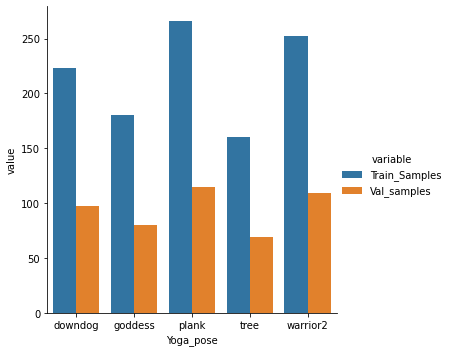

In [8]:
sns.catplot(x = 'Yoga_pose', y='value', 
               hue = 'variable',data=dfs1, kind='bar')
plt.show() # visualizing by barplot

# Hyper parameters

In [10]:
epochs = 20
batch_size = 32
drop_out = 0.2
activation = 'softmax' # hyper parameters
classes = 5

# below dunno this are default.
optimizer='adam'

# Data processing

In [11]:
# Data Pre processing

train_dir = "TRAIN"
test_dir = "TEST"

# dimensions of our images.
img_width, img_height = 224, 224
train_data_dir = train_dir
validation_data_dir = test_dir
nb_train_samples = 1081
nb_validation_samples = 470



if K.image_data_format() == 'channels_first':
    input_shape = (3 , img_width , img_height)
else:

    input_shape = (img_width,img_height,3)
    
print(input_shape)


# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
rescale=1. / 255,horizontal_flip=True,vertical_flip=True,rotation_range=180)
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(img_width, img_height),
batch_size=batch_size,
class_mode='categorical')




validation_generator = train_datagen.flow_from_directory(
test_dir,
target_size=(img_width, img_height),
batch_size=batch_size,
class_mode='categorical')

(224, 224, 3)
Found 1081 images belonging to 5 classes.
Found 470 images belonging to 5 classes.


# Pre_train_models

In [12]:
def vgg16():
    model1 = Sequential()
    checkpoint = ModelCheckpoint(filepath='vgg16.h5', mode='max', monitor='val_accuracy', verbose=2, save_best_only=True)
    callbacks_list = [checkpoint]
    vgg16_model = VGG16(weights='imagenet',include_top=False, input_shape=input_shape)
    model1.add(vgg16_model)
    model1.add(Flatten())
    model1.add(Dropout(drop_out))
    model1.add(Dense(classes,activation = activation))
    model1.layers[0].trainable = False
    model1.summary()
    model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    model1.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,callbacks = callbacks_list)

In [13]:
def mobilenet():
    model5= Sequential()
    checkpoint = ModelCheckpoint(filepath='mobilenet_B1.h5', mode='max', monitor='val_accuracy', verbose=2, save_best_only=True)
    callbacks_list = [checkpoint]
    mobilenet_model = MobileNetV2(weights='imagenet',include_top=False, input_shape=input_shape)
    model5.add(mobilenet_model)
    model5.add(Flatten())
    model5.add(Dropout(drop_out))
    model5.add(Dense(classes,activation = activation))
    model5.layers[0].trainable = False
    model5.summary()
    model5.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    model5.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,verbose=1,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,callbacks = callbacks_list)

In [14]:
vgg16()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 5)                 125445    
                                                                 
Total params: 14,840,133
Trainable params: 125,445
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/20
 3/33 [=>............................] - ETA: 4:04 - loss: 2.6774 - accuracy: 0.2083

C:\Users\rvchi\Anaconda3\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


33/33 [==============================] - ETA: 0s - loss: 1.8495 - accuracy: 0.3518 

C:\Users\rvchi\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  warnings.warn(



Epoch 00001: val_accuracy improved from -inf to 0.64732, saving model to vgg16.h5
33/33 [==============================] - 522s 16s/step - loss: 1.8495 - accuracy: 0.3518 - val_loss: 0.9152 - val_accuracy: 0.6473
Epoch 2/20
33/33 [==============================] - ETA: 0s - loss: 1.1421 - accuracy: 0.5663
Epoch 00002: val_accuracy improved from 0.64732 to 0.75446, saving model to vgg16.h5
33/33 [==============================] - 447s 14s/step - loss: 1.1421 - accuracy: 0.5663 - val_loss: 0.7200 - val_accuracy: 0.7545
Epoch 3/20
33/33 [==============================] - ETA: 0s - loss: 0.8512 - accuracy: 0.6864
Epoch 00003: val_accuracy improved from 0.75446 to 0.80580, saving model to vgg16.h5
33/33 [==============================] - 433s 13s/step - loss: 0.8512 - accuracy: 0.6864 - val_loss: 0.5540 - val_accuracy: 0.8058
Epoch 4/20
33/33 [==============================] - ETA: 0s - loss: 0.8353 - accuracy: 0.6816 
Epoch 00004: val_accuracy improved from 0.80580 to 0.81250, saving mode

In [15]:
mobilenet()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dropout_1 (Dropout)         (None, 62720)             0         
                                                                 
 dense_1 (Dense)             (None, 5)                 313605    
                                                                 
Total params: 2,571,589
Trainable params: 313,605
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/20
33/33 [==============================] - ETA: 0s - loss: 8.1098 - accuracy: 0.4261
Epoch 0000

C:\Users\rvchi\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


33/33 [==============================] - 68s 2s/step - loss: 8.1098 - accuracy: 0.4261 - val_loss: 2.3008 - val_accuracy: 0.6853
Epoch 2/20
33/33 [==============================] - ETA: 0s - loss: 3.0849 - accuracy: 0.6606
Epoch 00002: val_accuracy improved from 0.68527 to 0.75000, saving model to mobilenet_B1.h5
33/33 [==============================] - 70s 2s/step - loss: 3.0849 - accuracy: 0.6606 - val_loss: 1.9788 - val_accuracy: 0.7500
Epoch 3/20
33/33 [==============================] - ETA: 0s - loss: 2.1822 - accuracy: 0.7274
Epoch 00003: val_accuracy improved from 0.75000 to 0.75893, saving model to mobilenet_B1.h5
33/33 [==============================] - 71s 2s/step - loss: 2.1822 - accuracy: 0.7274 - val_loss: 1.7788 - val_accuracy: 0.7589
Epoch 4/20
33/33 [==============================] - ETA: 0s - loss: 1.8541 - accuracy: 0.7607
Epoch 00004: val_accuracy improved from 0.75893 to 0.77679, saving model to mobilenet_B1.h5
33/33 [==============================] - 82s 3s/step - 

15/15 [==============================] - 87s 6s/step - loss: 0.3399 - accuracy: 0.8915
89.15
0.34
Confusion Matrix
Classification Report
              precision    recall  f1-score   support

     downdog       0.22      0.22      0.22        97
     goddess       0.06      0.06      0.06        80
       plank       0.24      0.22      0.23       115
        tree       0.12      0.14      0.13        69
    warrior2       0.23      0.24      0.24       109

    accuracy                           0.19       470
   macro avg       0.18      0.18      0.18       470
weighted avg       0.19      0.19      0.19       470



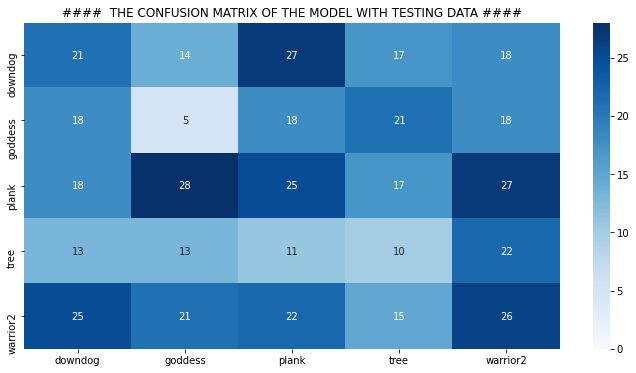

In [16]:
model1 = tf.keras.models.load_model("vgg16.h5")
score , acc = model1.evaluate(validation_generator)
accuracy = round(acc*100,2)
loss = round(score,2)

print(accuracy)
print(loss)

vg = pd.DataFrame({
    'Model': 'VGG16',
    'epochs': [epochs],
    'batch_size':[batch_size],
    'drop_out':[drop_out],
    'optimizer':[optimizer],
    'accuracy':[accuracy],
    'loss':[loss],
})

#Confusion Matrix
print('Confusion Matrix')
Y_pred = model1.predict(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
categories = ['downdog','goddess','plank','tree','warrior2']

cm1 = pd.DataFrame(confusion_matrix(validation_generator.classes, y_pred),columns=categories, index =categories)
plt.figure(figsize=(12, 6))
plt.title('####  THE CONFUSION MATRIX OF THE MODEL WITH TESTING DATA ####')
sns.heatmap(cm1, annot = True, fmt = 'g' ,vmin = 0, cmap = 'Blues')


# Classification Report
print('Classification Report')
target_names = ['downdog','goddess','plank','tree','warrior2']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))
vg_c = pd.DataFrame(classification_report(validation_generator.classes, y_pred, target_names=target_names,output_dict=True)).transpose()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

model1 = tf.keras.models.load_model("vgg16.h5")
score , acc = model1.evaluate(validation_generator)
accuracy = round(acc*100,2)
loss = round(score,2)

print(accuracy)
print(loss)

vg = pd.DataFrame({
    'Model': 'VGG16',
    'epochs': [epochs],
    'batch_size':[batch_size],
    'drop_out':[drop_out],
    'optimizer':[optimizer],
    'accuracy':[accuracy],
    'loss':[loss],
})

#Confusion Matrix
print('Confusion Matrix')
Y_pred = model1.predict(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
categories = ['downdog','goddess','plank','tree','warrior2']

cm1 = pd.DataFrame(confusion_matrix(validation_generator.classes, y_pred),columns=categories, index =categories)
plt.figure(figsize=(12, 6))
plt.title('####  THE CONFUSION MATRIX OF THE MODEL WITH TESTING DATA ####')
sns.heatmap(cm1, annot = True, fmt = 'g' ,vmin = 0, cmap = 'Blues')


# Classification Report
print('Classification Report')
target_names = ['downdog','goddess','plank','tree','warrior2']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))
vg_c = pd.DataFrame(classification_report(validation_generator.classes, y_pred, target_names=target_names,output_dict=True)).transpose()

 5/15 [=========>....................] - ETA: 1:10 - loss: 0.2540 - accuracy: 0.9062

In [6]:
model = tf.keras.models.load_model("vgg16.h5")
# img = 'unbalanced_data/train/akiec/ISIC_0026149.jpg'
img= cv2.imread("sampletest.jpg")
img= cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img= cv2.resize(img,(224,224))
image = np.asfarray(img)
image = image / 225
image = np.expand_dims(image,0)




def predict(image: np.ndarray):
    label = {'downdog':0,'goddess':1,'plank':2,'tree':3,'warrior2':4}
    classes = list(label)
    predictions = classes[np.argmax(model.predict(image))]
    prob = model.predict(image)
    temp = ['downdog','goddess','plank','tree','warrior2']
    dum = 0
    for i in temp:
        label[i] = str(round(prob[0][dum]*100,2)) + '%'
        dum += 1
    a = str(label).replace("{",'')
    b = a.replace("}",'')
    c = b.replace("," , "\n")
    d = c.replace("'",'')
    dic = {'prediction':predictions,'probability':d}
    return dic

In [7]:
predict(image).get('prediction')

'plank'

In [8]:
predict(image).get('probability')

'downdog: 9.74%\n goddess: 0.11%\n plank: 88.8%\n tree: 1.19%\n warrior2: 0.15%'